# Caculation of He Atom By Variational Method(Version1.0)
# (By LI Na & LIU Ze-fei)

In [31]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

#Draw Pictures
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font',family='serif',size='16')
fig = plt.figure(1,figsize=(7,5))## To save figure.


tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

<Figure size 504x360 with 0 Axes>

$FC' = SC'E'$ (Generalized Eigenvalue Problem)

$\left[
-\frac{1}{2}\nabla_1^2 - \frac{2}{r_1} + C_r C_s \int{\rm{d}}^3 r_2 \, e^{-\alpha_r r_1^2} e^{-\alpha_s r_2^2} \frac{1}{|r_1 - r_2|}
\right]\psi(\boldsymbol{r_1}) = E' \psi(\boldsymbol{r_1}) \\ $
(Used Born-Oppenheimer approximation)

$(h_{pq} + Q_{pqrs} C_r C_s)C_q = E'S_{pq} C_q$ (Here we used Einstein Summation Convention)

$\chi_p(\boldsymbol{r}) = e^{-\alpha_p r^2}$

$\begin{aligned}
\alpha_1 & = 38.421634 \\
\alpha_2 & = 5.77803 \\
\alpha_3 & = 1.241774 \\
\alpha_4 & = 0.297964 \\
\alpha_5 & = 0.086 \\
\end{aligned}$

(6-31++G)

$\begin{aligned}
S_{pq} & = \int {\rm{d}}^3 r \, e^{-\alpha_p r^2} e^{-\alpha_q r^2} = \left(\frac{\pi}{\alpha_p+\alpha_q}\right)^{3/2} \\
T_{pq} & = -\frac{1}{2}\int{\rm{d}}^3 r \, e^{-\alpha_p r^2}\nabla^2 e^{-\alpha_q r^2}
= 3\frac{\alpha_p \alpha_q \pi^{3/2}}{(\alpha_p + \alpha_q)^{5/2}} \\
A_{pq} & = -\int{\rm{d}}^3 r \,  e^{-\alpha_p r^2} \frac{2}{r} e^{-\alpha_q r^2} = -\frac{4\pi}{\alpha_p + \alpha_q} \\
h_{pq} & = T_{pq} + A_{pq} \\
\end{aligned}$

In [32]:
##########################################################
##################### He atom. ###########################
##########################################################

def calc_S(Alpha,N_tot):
    S = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            y = np.pi/(Alpha[i]+Alpha[j])
            S[i,j] = y*np.sqrt(y)
            
    return S
def calc_T(Alpha,N_tot):
    T = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            y = 3.0E0*Alpha[i]*Alpha[j]*np.pi*np.sqrt(np.pi)
            z = (Alpha[i]+Alpha[j])**2*np.sqrt(Alpha[i]+Alpha[j])
            T[i,j] = y/z
    return T
def calc_A(Alpha,N_tot):
    A = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            A[i,j] = -4.0E0*np.pi/(Alpha[i]+Alpha[j])
    return A

def calc_H(Alpha,N_tot):
    H = np.zeros((N_tot,N_tot))
    T = calc_T(Alpha,N_tot)
    A = calc_A(Alpha,N_tot)
    H = np.add(T,A)
    return H

$\begin{aligned}
Q_{pqrs} & = \int{\rm{d}}^3 r_1 \rm{d}^3 r_2 \, e^{-\alpha_p r_1^2} e^{-\alpha_q r_2^2} \frac{1}{|r_1 - r_2|} e^{-\alpha_r r_1^2} e^{-\alpha_s r_2^2} = \frac{2\pi^\frac{5}{2}}{(\alpha_p + \alpha_q)(\alpha_r + \alpha_s)(\alpha_p + \alpha_q + \alpha_r + \alpha_s)^\frac{1}{2}} \\
\end{aligned}$

In [33]:
def calc_Q(Alpha,N_tot):
    Q = np.zeros((N_tot,N_tot,N_tot,N_tot))
    for i in range(N_tot):
        for j in range(N_tot):
            for k in range(N_tot):
                for l in range(N_tot):
                    Q[i,j,k,l] = (2*np.pi**(5/2))/((Alpha[i]+Alpha[j])*(Alpha[k]+Alpha[l])*np.sqrt(Alpha[i]+Alpha[j]+Alpha[k]+Alpha[l]))
    return Q

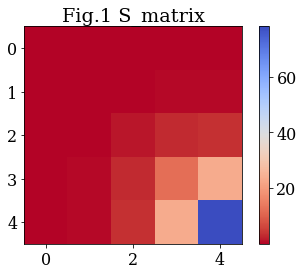

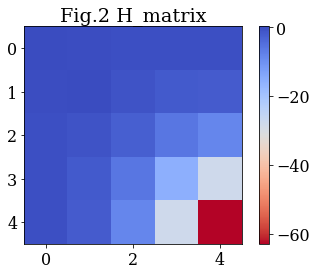

[[[[4.77941909e-04 9.36289527e-04 1.06349002e-03 1.09385274e-03
    1.10088389e-03]
   [9.36289527e-04 4.19048781e-03 7.08253095e-03 8.22912768e-03
    8.53750068e-03]
   [1.06349002e-03 7.08253095e-03 2.05833606e-02 3.33995846e-02
    3.87839234e-02]
   [1.09385274e-03 8.22912768e-03 3.33995846e-02 8.68209717e-02
    1.34934533e-01]
   [1.10088389e-03 8.53750068e-03 3.87839234e-02 1.34934533e-01
    3.01635177e-01]]

  [[9.36289527e-04 1.90476876e-03 2.17926628e-03 2.24505588e-03
    2.26030454e-03]
   [1.90476876e-03 9.17341818e-03 1.57558991e-02 1.83733984e-02
    1.90777907e-02]
   [2.17926628e-03 1.57558991e-02 4.66479740e-02 7.60140094e-02
    8.83537411e-02]
   [2.24505588e-03 1.83733984e-02 7.60140094e-02 1.98460590e-01
    3.08750379e-01]
   [2.26030454e-03 1.90777907e-02 8.83537411e-02 3.08750379e-01
    6.90882838e-01]]

  [[1.06349002e-03 2.17926628e-03 2.49697740e-03 2.57319591e-03
    2.59086548e-03]
   [2.17926628e-03 1.06656501e-02 1.83911675e-02 2.14660468e-02
    2.22

In [34]:
N_tot = 5
#----------------------------------------------------------------------
#   Basis set: 6-31++G
# Description: 6-31G + diffuse on all atoms
#        Role: orbital
#     Version: 1  (Data from Gaussian 09/GAMESS)
#----------------------------------------------------------------------
Alpha = np.array([38.421634, 5.77803, 1.241774, 0.297964, 0.086],dtype=float)


S_matrix = calc_S(Alpha,N_tot)
H_matrix = calc_H(Alpha,N_tot)
Q_matrix = calc_Q(Alpha,N_tot)

plt.title('Fig.1 S_matrix')
plt.imshow(S_matrix,cmap='coolwarm_r')
plt.colorbar()
plt.savefig('S_matrix.png',dpi=400,format='png')

plt.show()
plt.title('Fig.2 H_matrix')
plt.imshow(H_matrix,cmap='coolwarm_r')
plt.colorbar()
plt.savefig('H_matrix.png',dpi=400,format='png')

plt.show()
print(Q_matrix)

In [111]:
#Initialize Matrix C and F
#C = np.ones([N_tot,1])
Cg = [0.0000000001,0.0E0,0.0E0,0.0E0,0.0000000000001]
F_matrix = np.zeros([N_tot,N_tot])
print(Cg)
print(F_matrix)

[1e-10, 0.0, 0.0, 0.0, 1e-13]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


$\begin{aligned}
Calculate F_{pq} \\
F_{pq} = h_{pq} + Q_{pqrs} C_r C_s
\end{aligned}$

In [112]:
#Calculate F Matrix to get the effective H_matrix like H atom calculation(HC = ESC)
def calc_F(H,Q,S,Cg):
    temp = np.einsum('pqrs, s, r ->pq', Q, Cg, Cg)
    F = H + temp
    return F

# Generalized Eigenvalue Problem
$\begin{aligned}
& V^{\dagger}SV = I \\
& U^{\dagger}SU = s \\
& V = Us^{-1/2} \\
& F'=V^{\dagger}FV \\
& F'C'=E'C' \\
& C=VC' \\
\end{aligned}$

In [113]:
#Iteration 15 times
E_list = [0]#Store energy per cycle
for i in  range(1,16):
    #Normalize the coefficients
    Cgt = np.transpose(Cg)
    c = np.dot(Cgt,np.dot(S_matrix,Cg))
    Cg = Cg/ np.sqrt(c)
    Cgt = Cgt/ np.sqrt(c)
    Cg = Cg.reshape(N_tot)
    F_matrix = calc_F(H_matrix,Q_matrix,S_matrix,Cg)
    #Calculate Generalized Eigenvalue Problem
    ## Step 1: Calculate U and s.
    small_S, U = np.linalg.eigh(S_matrix)
    ## Step 2: Calculate s^{-1/2}.
    half_S = np.zeros((N_tot,N_tot))
    for i in range(N_tot):
        half_S[i,i] = 1.0E0/np.sqrt(np.abs(small_S[i]))
    #print(half_S[i,i])
    ## Step 3: Calculate V = Us^{-1/2}.
    V = np.dot(U,half_S)
    ## Step 4: Calculate F' = V^d F V.
    Vd = np.transpose(V)
    tmp = np.dot(F_matrix,V)
    F_prime = np.dot(Vd,tmp)
    ### Step 5: Calculate the eigenvalue problem.
    E_prime, C_prime = np.linalg.eigh(F_prime)
    ### Step 6: Obtain the coefficients Matrix C.
    C = np.dot(V,C_prime)
    Cg = np.dot(V,C_prime[:,0])
    Cg = Cg.reshape(N_tot,1)
    Cgt = np.transpose(Cg)
    c = np.dot(np.dot(Cgt,S_matrix),Cg)
    Cg = Cg/ np.sqrt(c)
    Cgt = Cgt/ np.sqrt(c)
    ###Calculate ground energy
    E1 = float(2 * np.dot(Cgt,np.dot(H_matrix,Cg)))
    Cg = Cg.reshape(N_tot,)
    E2 = float(np.einsum('pqrs, s, r,q,p ->',Q_matrix,Cg,Cg,Cg,Cg))
    E = E1 + E2
    E_list.append(E)
    print(E)

-2.4331994145336067
-2.8227662448837747
-2.8528919574833034
-2.8554393504943194
-2.855658612671462
-2.855677439030108
-2.855679057064391
-2.855679196090148
-2.8556792080365465
-2.855679209063066
-2.8556792091512757
-2.8556792091588523
-2.855679209159506
-2.855679209159564
-2.8556792091595673


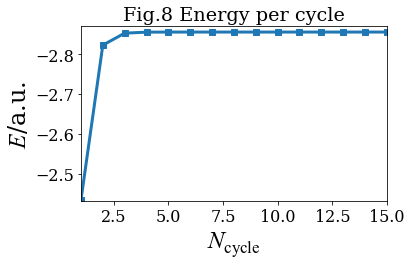

In [116]:
plt.plot(E_list,'s-',lw=3)
plt.title("Fig.8 Energy per cycle")

plt.xlabel(r"$N_{\rm{cycle}}$",fontsize=24)
plt.ylabel(r"$E$/a.u.",fontsize=24)
figname = 'ene_per_cycle_He_Var.png'
plt.axis([1,15,-2.43,-2.87])
plt.tight_layout()
plt.savefig(figname,dpi=400,format = 'png')
plt.show()

In [9]:
print(E_prime)
print(V)
print(C_prime)

[-0.91686687 -0.11437956  0.92525534  7.82219328 61.15763399]
[[ 1.38020739e+01 -8.42065704e-01  4.26454811e-02 -1.84714129e-03
   3.83631051e-05]
 [-2.94724115e+00 -3.66818585e+00  4.41602018e-01 -2.66360767e-02
   6.32720589e-04]
 [ 5.84037437e-01  1.33415241e+00  1.13016634e+00 -1.62754503e-01
   5.57125202e-03]
 [-1.05893592e-01 -2.95974746e-01 -4.85973299e-01 -3.78385040e-01
   3.28658602e-02]
 [ 1.52047634e-02  4.52496328e-02  9.14614425e-02  1.30065213e-01
   1.02714784e-01]]
[[-1.31695342e-02 -4.21407539e-03  2.07946736e-02  5.21065169e-02
  -9.98329253e-01]
 [ 7.66314957e-02  3.65998097e-02  2.90398121e-02  9.94639423e-01
   5.13534324e-02]
 [-3.33135398e-01 -8.11103633e-02  9.39069545e-01 -2.09203412e-05
   2.42961906e-02]
 [ 6.89581137e-01  6.52922390e-01  3.01281960e-01 -8.54322127e-02
  -1.00362095e-02]
 [-6.38320327e-01  7.52167639e-01 -1.61560643e-01  2.60512071e-02
   3.23994021e-03]]


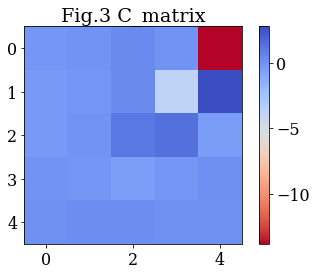

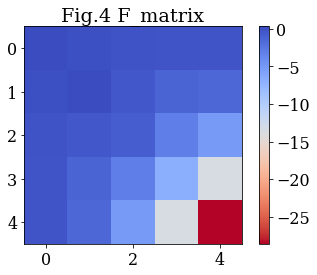

In [24]:
plt.title('Fig.3 C_matrix')
plt.imshow(C,cmap='coolwarm_r')
plt.colorbar()
plt.savefig('C_matrix.png',dpi=400,format='png')

plt.show()
plt.title('Fig.4 F_matrix')
plt.imshow(F_matrix,cmap='coolwarm_r')
plt.colorbar()
plt.savefig('F_matrix.png',dpi=400,format='png')

plt.show()

In [11]:
print('Ground Energy is ',E,' a.u.')
print(Cg)

Ground Energy is  -2.8556792091595673  a.u.
[-0.2618006  -0.40816965 -0.3977405  -0.14129764 -0.00307615]


In [12]:
###Construct the wavefunctions.
interval = 0.001
x = np.arange(0.0,1.0E0+interval,interval)
def basis_f(x,n):
    y = np.exp(-Alpha[n]*x)
    return y


y_tot = np.zeros((len(x),N_tot))
for j in range(N_tot):
    for i in range(N_tot):
        y_tot[:,j] += basis_f(x,i)*C[i,j]

print(C)

[[-2.61800600e-01 -9.36185993e-02  3.02040556e-01 -1.18215838e-01
  -1.38212023e+01]
 [-4.08169653e-01 -1.74568886e-01  2.38757469e-01 -3.79980990e+00
   2.76494174e+00]
 [-3.97740498e-01 -1.47375199e-01  1.06225810e+00  1.37145872e+00
  -4.85438126e-01]
 [-1.41297642e-01 -1.93304333e-01 -5.86470215e-01 -2.66713264e-01
   8.26140867e-02]
 [-3.07615406e-03  1.56354809e-01  1.10110510e-01  3.73615077e-02
  -1.16060435e-02]]


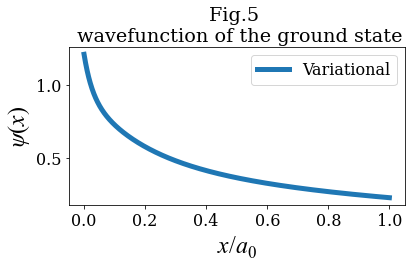

In [29]:
plt.title('Fig.5 \n wavefunction of the ground state')
plt.plot(x,-(y_tot[:,0]),'-',lw=5,label="Variational")
#plt.plot(x,np.exp(-x)/2,'--',lw=5,label="Analytical")
plt.legend(loc='best')
plt.xlabel(r"$x/a_0$",fontsize=24)
plt.ylabel(r"$\psi(x)$",fontsize=24)
figname = "He-ground wavefunction.png"
plt.tight_layout()
plt.savefig(figname,dpi=400,format='png')
plt.show()